In [1]:
import keras
from keras.models import load_model
from mlxtend.data import loadlocal_mnist
import numpy as np
from matplotlib import pyplot as plt

In [2]:
model = load_model('TEXtractor - Model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 256)               2359552   
                                                        

In [3]:
x_train, y_train = loadlocal_mnist(images_path='emnist-byclass-train-images-idx3-ubyte', labels_path='emnist-byclass-train-labels-idx1-ubyte')
x_test, y_test = loadlocal_mnist(images_path='emnist-byclass-test-images-idx3-ubyte', labels_path='emnist-byclass-test-labels-idx1-ubyte')

In [4]:
# Reshaping the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_train /= 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_test = x_test.astype('float32')
x_test /= 255

# One-Hot Encoding
y_train = keras.utils.to_categorical(y_train, 62)
y_test = keras.utils.to_categorical(y_test, 62)

In [5]:
# Predicting the Test set results
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

3636/3636 [==============================] - 36s 10ms/step


In [6]:
# Calculating the Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8703695743748012


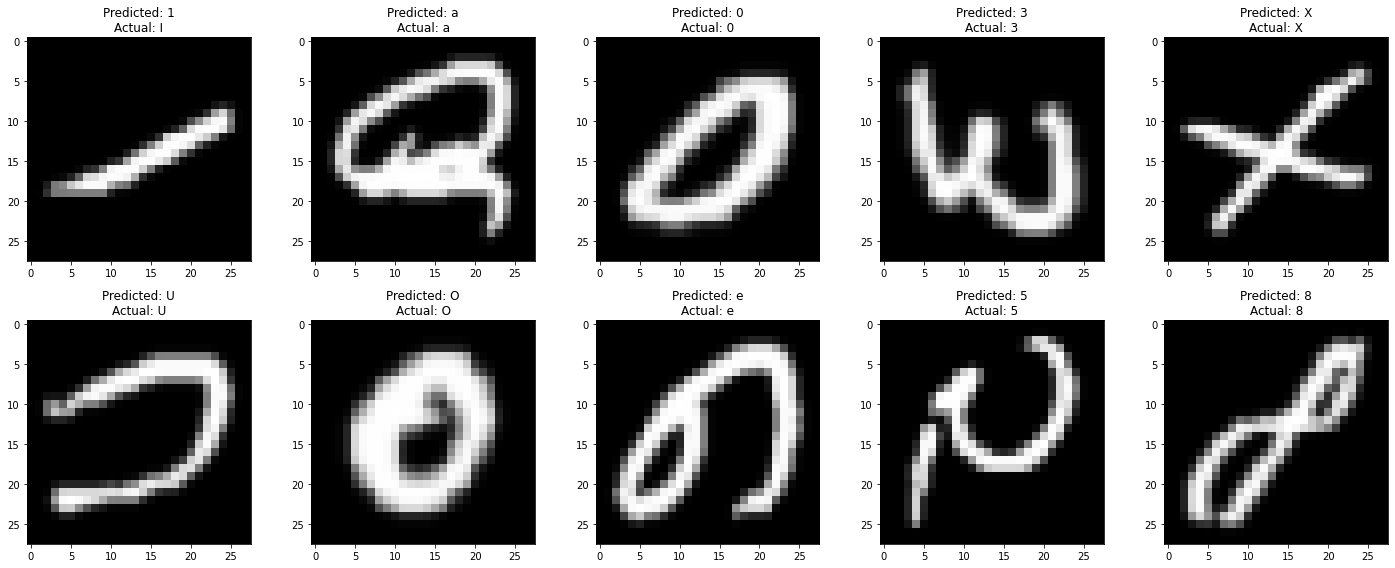

In [7]:
# Plotting few images from the Test set to see the results
plt.figure(figsize=(20, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.tight_layout()
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray', interpolation='none')

    # Predicted label
    if y_pred[i] <= 9:
        title_pred = str(y_pred[i])
    elif y_pred[i] <= 35:
        title_pred = chr(y_pred[i] + 55)
    else:
        title_pred = chr(y_pred[i] + 61)
    
    # Actual label
    if y_test[i] <= 9:
        title_actual = str(y_test[i])
    elif y_test[i] <= 35:
        title_actual = chr(y_test[i] + 55)
    else:
        title_actual = chr(y_test[i] + 61)
    
    plt.title("Predicted: {}\nActual: {}".format(title_pred, title_actual))
plt.show()